In [ ]:
!nvidia-smi

Sun Jun 14 01:33:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pwd

/content


In [ ]:
!ls

drive  sample_data


In [ ]:
cd drive/

In [1]:
#Install detectron2

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
     |████████████████████████████████| 6.4 MB 1.6 MB/s 
     |████████████████████████████████| 130 kB 6.9 MB/s 
     |████████████████████████████████| 145 kB 60.2 MB/s 
     |████████████████████████████████| 74 kB 3.9 MB/s 
     |████████████████████████████████| 49 kB 7.6 MB/s 
     |████████████████████████████████| 743 kB 50.4 MB/s 
     |████████████████████████████████| 747 kB 45.7 MB/s 
     |████████████████████████████████| 636 kB 70.2 MB/s 
     |████████████████████████████████| 112 kB 78.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210924-py3-none-any.whl size=60829 sha256=b5d77b77ad11dc37464e3c0575158a592a39397b442d0c4eb9ca424f87416bf6
  Stored in directory: /root/.cache/pip/wheels/70/c6/de/aa41c65141bdbc9a8aa4b303ce26482aa2f1720ff41b7f17c3
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=0c953

In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9") 

1.9.0+cu102 True


In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [4]:
%cd /content/drive/MyDrive/detectron2_class

/content/drive/MyDrive/detectron2_class


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/images/
  inflating: data/images/1.jpg       
  inflating: data/images/14-german-shepherd-CruftsChannel4.jpg  
  inflating: data/images/30_07_2018-helmateddn_18257838_9831516.jpg  
  inflating: data/images/300px-I-80_Eastshore_Fwy.jpg  
  inflating: data/images/1280px-German_Shepherd_Dog_with_disc.jpg  
  inflating: data/images/3451e49fa7e5f3584138c4cbb983112e.jpg  
  inflating: data/images/3600.jpg    
  inflating: data/images/3600 (1).jpg  
  inflating: data/images/106036.jpg  
  inflating: data/images/177961-may23-helmet.jpg  
  inflating: data/images/1171297-slow-motion-timelapse-city-cars-traffic-wide-road-vehicles-day-stock-video-footage-videoblocks-wide-road-png-1920_1080_preview.png  
  inflating: data/images/01272020-Kawasaki-Ninja-650-4411-633x388.jpg  
  inflating: data/images/animals_hero_koala02 copy.jpg  
  inflating: data/images/assortment-of-colorful-ripe-tropical-fruits-top-royalty-free-image-995518546-1564092355.

In [6]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sample", {}, "./data/trainval.json", "./data/images")

In [7]:
sample_metadata = MetadataCatalog.get("sample")
dataset_dicts = DatasetCatalog.get("sample")

WARNING [09/25 06:09:25 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/25 06:09:25 d2.data.datasets.coco]: Loaded 51 images in COCO format from ./data/trainval.json


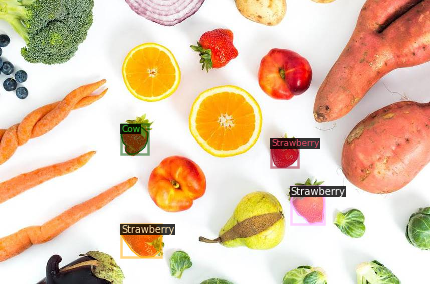

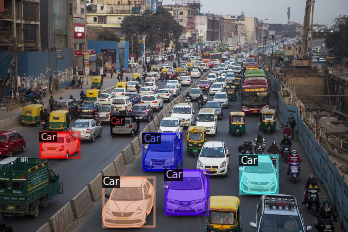

In [8]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5422 (delta 1), reused 4 (delta 1), pack-reused 5415
Receiving objects: 100% (5422/5422), 2.53 MiB | 24.45 MiB/s, done.
Resolving deltas: 100% (3899/3899), done.


In [10]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("sample",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14  # 3 classes (Person, Helmet, Car)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/25 06:15:02 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:03, 56.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (15, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (56, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (56,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due 

[09/25 06:15:07 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[09/25 06:15:17 d2.utils.events]:  eta: 0:07:38  iter: 19  total_loss: 3.419  loss_cls: 2.187  loss_box_reg: 0.5879  loss_mask: 0.684  loss_rpn_cls: 0.03982  loss_rpn_loc: 0.01251  time: 0.4690  data_time: 0.0209  lr: 0.00039962  max_mem: 2671M
[09/25 06:15:26 d2.utils.events]:  eta: 0:07:37  iter: 39  total_loss: 2.083  loss_cls: 0.8632  loss_box_reg: 0.6485  loss_mask: 0.5535  loss_rpn_cls: 0.0207  loss_rpn_loc: 0.009244  time: 0.4703  data_time: 0.0075  lr: 0.00079922  max_mem: 2761M
[09/25 06:15:36 d2.utils.events]:  eta: 0:07:30  iter: 59  total_loss: 1.674  loss_cls: 0.5183  loss_box_reg: 0.6343  loss_mask: 0.3895  loss_rpn_cls: 0.004217  loss_rpn_loc: 0.01042  time: 0.4694  data_time: 0.0074  lr: 0.0011988  max_mem: 2761M
[09/25 06:15:45 d2.utils.events]:  eta: 0:07:21  iter: 79  total_loss: 1.353  loss_cls: 0.4985  loss_box_reg: 0.5843  loss_mask: 0.234  loss_rpn_cls: 0.006491  loss_rpn_loc: 0.009675  time: 0.4716  data_time: 0.0101  lr: 0.0015984  max_mem: 2761M
[09/25 06:15:5

In [11]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("sample", )
predictor = DefaultPredictor(cfg)

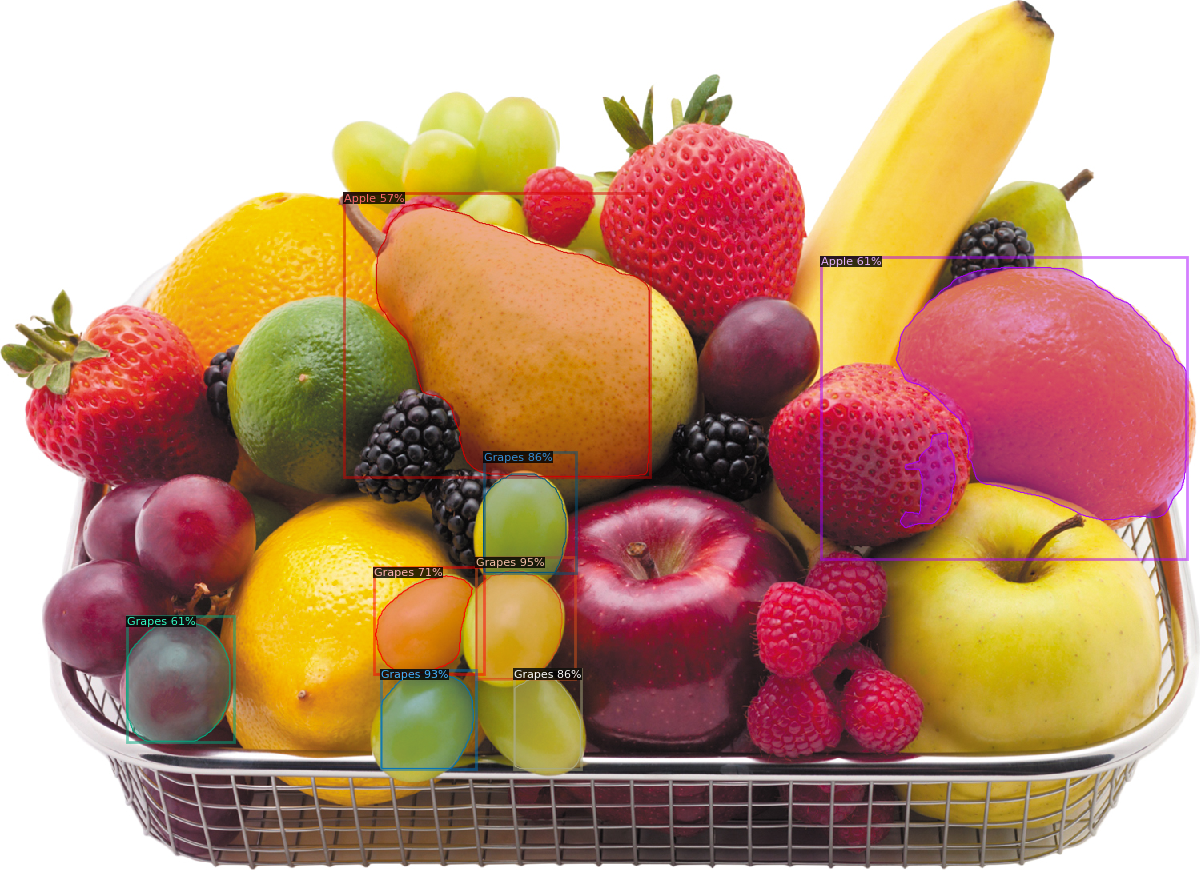

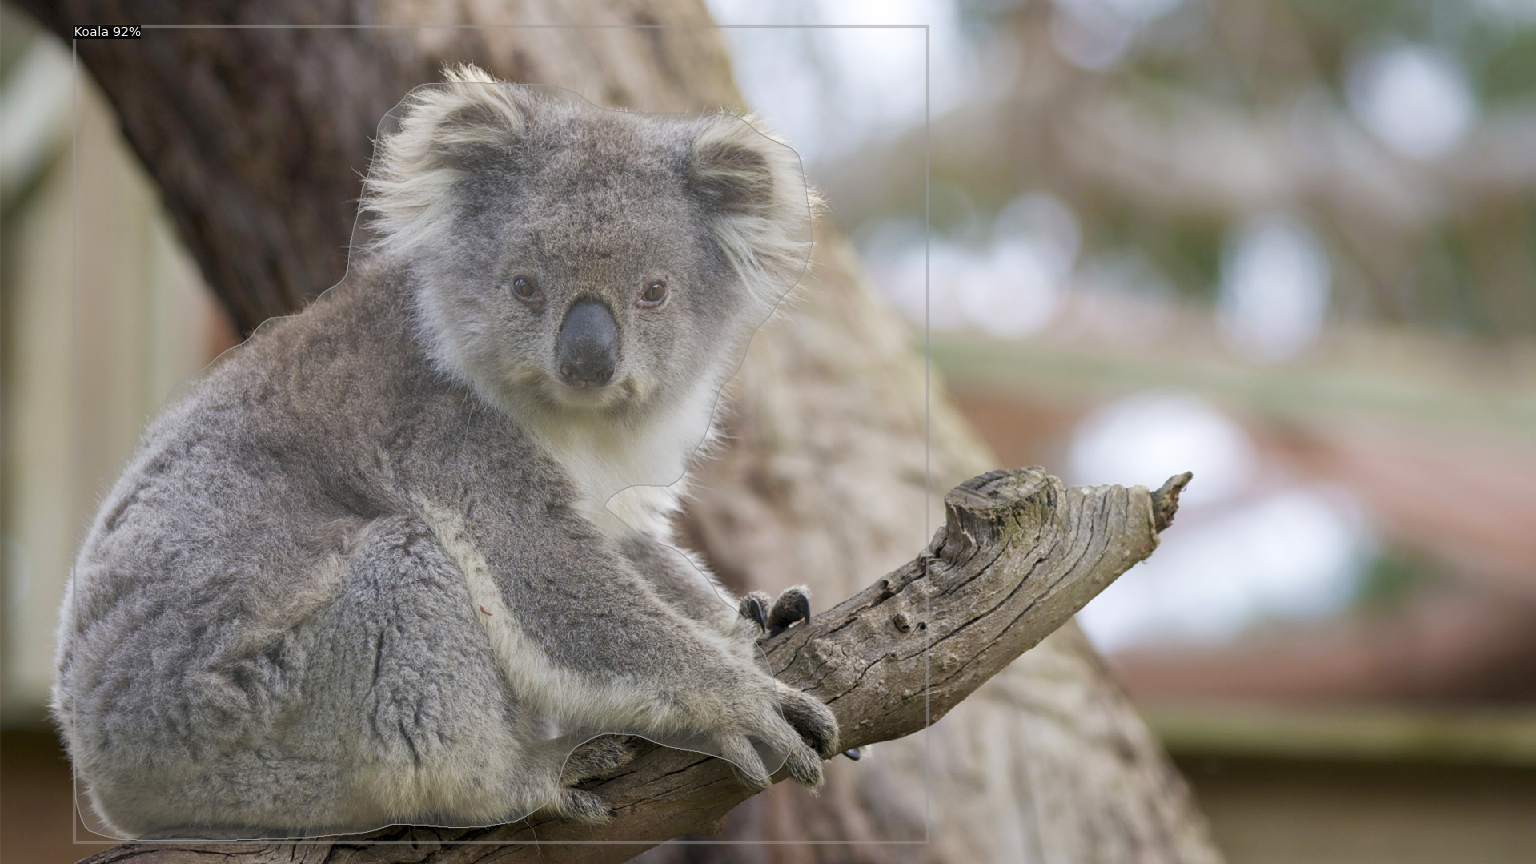

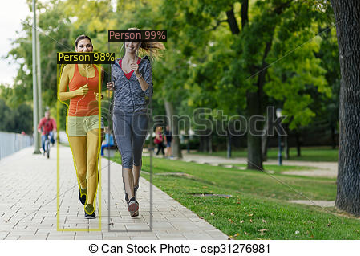

In [12]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])